In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

# Define file path

In [2]:

inDir = '/home/yuzhang/XScattering/Beam_Damage_Study/Results/'
outDir = '/home/yuzhang/XScattering/Beam_Damage_Study/Results/'
plotDir = '/home/yuzhang/XScattering/Beam_Damage_Study/Results/PostPlot/'



# Give data name

In [3]:
uid = '63302744'
uid = 'b93fcfc2'
uid = 'b5f6575c'

uid_list = np.sort( ls_dir( inDir, have_list=[   uid , 'h5'  ], exclude_list=['waxs', 'AgBH', 'csv', 'png']) )  

print( len( uid_list ))
print( uid_list )

250
['b5f6575c-482d-4e68-9776_000000.tiff.h5'
 'b5f6575c-482d-4e68-9776_000001.tiff.h5'
 'b5f6575c-482d-4e68-9776_000002.tiff.h5'
 'b5f6575c-482d-4e68-9776_000003.tiff.h5'
 'b5f6575c-482d-4e68-9776_000004.tiff.h5'
 'b5f6575c-482d-4e68-9776_000005.tiff.h5'
 'b5f6575c-482d-4e68-9776_000006.tiff.h5'
 'b5f6575c-482d-4e68-9776_000007.tiff.h5'
 'b5f6575c-482d-4e68-9776_000008.tiff.h5'
 'b5f6575c-482d-4e68-9776_000009.tiff.h5'
 'b5f6575c-482d-4e68-9776_000010.tiff.h5'
 'b5f6575c-482d-4e68-9776_000011.tiff.h5'
 'b5f6575c-482d-4e68-9776_000012.tiff.h5'
 'b5f6575c-482d-4e68-9776_000013.tiff.h5'
 'b5f6575c-482d-4e68-9776_000014.tiff.h5'
 'b5f6575c-482d-4e68-9776_000015.tiff.h5'
 'b5f6575c-482d-4e68-9776_000016.tiff.h5'
 'b5f6575c-482d-4e68-9776_000017.tiff.h5'
 'b5f6575c-482d-4e68-9776_000018.tiff.h5'
 'b5f6575c-482d-4e68-9776_000019.tiff.h5'
 'b5f6575c-482d-4e68-9776_000020.tiff.h5'
 'b5f6575c-482d-4e68-9776_000021.tiff.h5'
 'b5f6575c-482d-4e68-9776_000022.tiff.h5'
 'b5f6575c-482d-4e68-9776_0000

# Check one dataset

In [4]:
fp = uid_list[0]

In [5]:
res = h5todict(  inDir + fp   )
q= res['sq']['ciravg']['data'][:,0]     
sq=res['sq']['ciravg']['data'][:,1] 


<IPython.core.display.Javascript object>


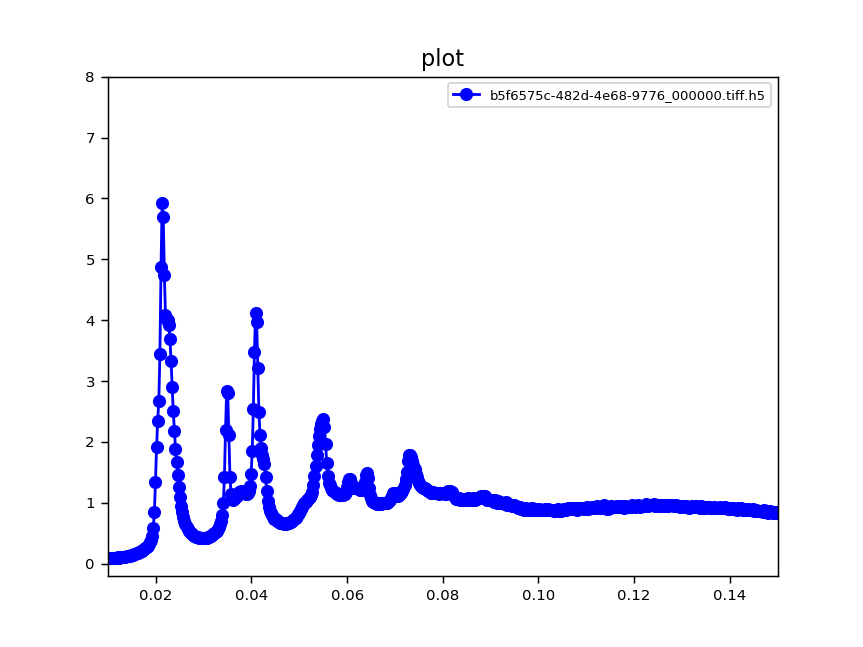

(-0.2, 8)

In [6]:
fig = plt.figure()
ax = fig.add_subplot( 111 ) 
i = 0

plot1D( x= q, y=sq, m=  markers[i], c= colors[i], ax=ax, legend= fp, legend_size = 7  )

ax.set_xlim( [0.01, 0.15 ])
ax.set_ylim( [ -0.2, 8 ])


In [7]:
%run -i beam_damage_study.py

# Extract all the sq data

### For this particular dataset make a meaningful dict

In [8]:
md = {}

#13.5keV,  2.49e10 ph/s, 200 X 200 um2

md[ '63302744'  ] = ['fcc_T=0.12_0.04X125', 0.12*0.04, 125]
md['b93fcfc2'] = ['fcc_T=1_0.04X125', 0.04 , 125]
md[ 'f3b03825'] = ['fcc_T=1_0.04X125', 0.04 , 125]
md[ 'b5f6575c'] = ['fcc_T=1_0.2X250', 0.2 , 250]
md[ 'e4876385'] = ['fcc_T=1_0.2X250', 0.2 , 250]

md['bf91e4e9'] = ['bcc_T=1_0.2X250', 0.2 , 250]
md['1a847d49'] = ['bcc_T=1_0.2X250', 0.2, 250]
md[ '7fab4334'] = ['bcc_T=0.12_0.2X250', 0.12*0.2, 250]
md[ 'c2666115'] = ['bcc_T=0.12_0.2X250', 0.12*0.2, 250]
md[ '93e06c11'] = ['bcc_T=0.12_0.2X250', 0.12*0.2, 250]


In [9]:
md.keys()

dict_keys(['63302744', 'b93fcfc2', 'f3b03825', 'b5f6575c', 'e4876385', 'bf91e4e9', '1a847d49', '7fab4334', 'c2666115', '93e06c11'])

#### Extract data and save to a npz file just for convenience

In [179]:
if False:
#if True:    
    for uid in ['63302744', 'b93fcfc2', 'f3b03825', 'b5f6575c', 
              'e4876385', 'bf91e4e9', '1a847d49', '7fab4334', 'c2666115', '93e06c11']:    
        uid_list = np.sort( ls_dir( inDir, have_list=[   uid , 'h5'  ], exclude_list=['waxs', 'AgBH', 'csv', 'png']) )  
        print(uid, len(uid_list))
        q, sqs = get_series_data( uid_list, inDir, type='iq' )
        np.savez( file=outDir + uid + 'iq',  q=q, sqs=sqs, )    


# Load one data 

In [180]:
#uid = '63302744'
#uid = 'b93fcfc2'
#uid = 'f3b03825'
#uid = 'b5f6575c'
#uid = 'e4876385'
#uid = 'bf91e4e9'
uid = '1a847d49'
#uid = '7fab4334'
#uid = 'c2666115'
#uid = '93e06c11'

#uid_list = np.sort( ls_dir( inDir, have_list=[   uid , 'h5'  ], exclude_list=['waxs', 'AgBH', 'csv', 'png']) )  

In [181]:

#d=np.load(  outDir + uid + 'iq.npz')
d=np.load(  outDir + uid + '.npz')
q,sqs = d['q'], d['sqs']
print( uid, md[uid] )


1a847d49 ['bcc_T=1_0.2X250', 0.2, 250]


# Plot the data

In [182]:
x1,x2=[0.01,0.1]
q1,q2 = find_index(q,x1 ),  find_index(q,x2)    

<IPython.core.display.Javascript object>


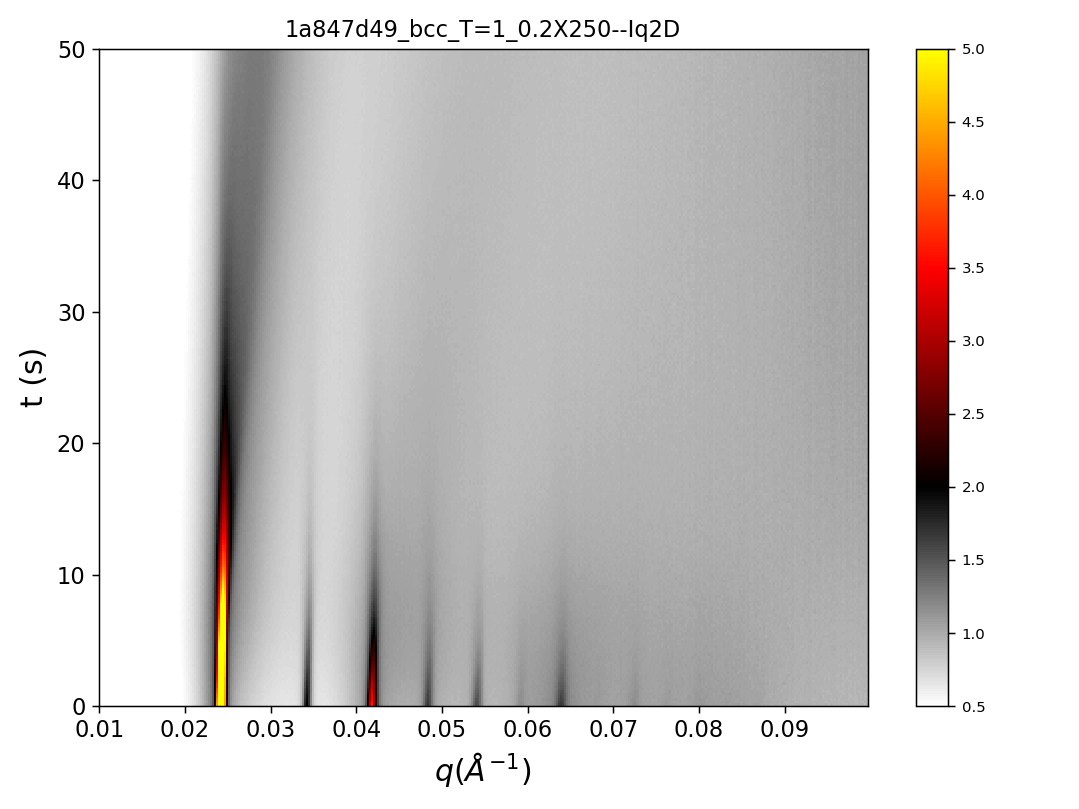

In [183]:
fig, ax = plt.subplots( figsize= [8,6])

show_img( sqs[q1:q2].T, vmin=  .5, vmax=  5,   ax= [fig,ax], logs=False, show_colorbar=True,
          extent=[ q[q1:q2].min(), q[q1:q2].max(), 0,   md[uid][1] * md[uid][2]]  ,    
          xlabel=r'$q (\AA^{-1})$', ylabel='t (s)',   cmap =  cmap_albula, )
         #cmap=cmap_hdr_goldish )
ax.set_title( uid + '_%s--Iq2D'%md[uid][0] )
plt.savefig( plotDir + 'uid=%s_2D_Iq_%s.png'%(uid, md[uid][0] ))



<IPython.core.display.Javascript object>


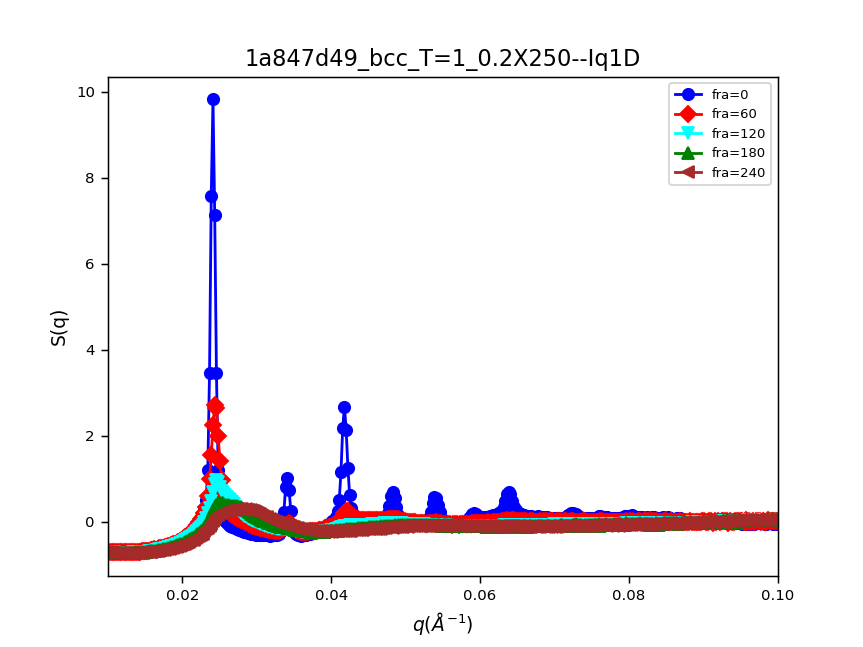

In [331]:
N = sqs.shape[1]
fig = plt.figure()
ax = fig.add_subplot( 111 ) 
i = 0
for j in range( N ) [::60]:
    q = q
    #sq = np.abs( sqs[:,j] - a )
    sq =   sqs[:,j]  
    plot1D( x= q, y=sq, m=  markers[i], c= colors[i], ax=ax, legend= 'fra=%s'%j, legend_size = 7, logy= False  )
    i+=1    
ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 5e-1, .2e4])
ax.set_title( uid + '_%s--Iq1D'%md[uid][0] )
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel('S(q)')

plt.savefig( plotDir + 'uid=%s_1D_Sq_%s.png'%(uid, md[uid][0] ))



<IPython.core.display.Javascript object>


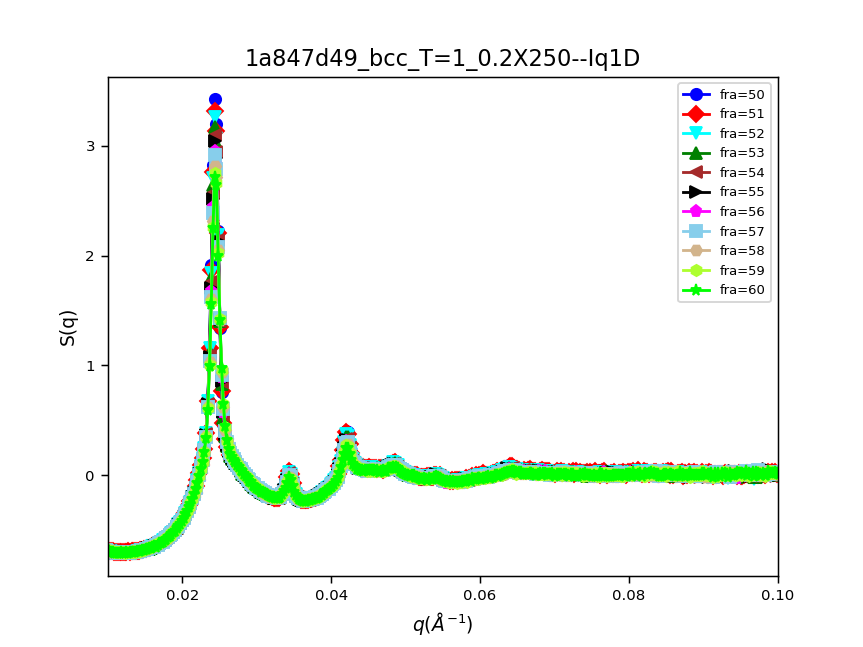

Text(0, 0.5, 'S(q)')

In [580]:
N = sqs.shape[1]
fig = plt.figure()
ax = fig.add_subplot( 111 ) 
i = 0
for j in range( N ) [50:61]:
    q = q
    #sq = np.abs( sqs[:,j] - a )
    sq =   sqs[:,j]  
    plot1D( x= q, y=sq, m=  markers[i], c= colors[i], ax=ax, legend= 'fra=%s'%j, legend_size = 7, logy= False  )
    i+=1    
ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 5e-1, .2e4])
ax.set_title( uid + '_%s--Iq1D'%md[uid][0] )
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel('S(q)')

 


# Do a fitting of the first peak

In [330]:
%run -i /home/yuzhang/XScattering/SAXS/Codes/beam_damage_study.py

In [376]:
%run -i /home/yuzhang/XScattering/SAXS/Codes/Curve_Fit.py

In [402]:
q1, q2 =  0.015, 0.032
print(q1,q2)
fits = np.zeros( [N, 4]) #store fit results with q0, width, peak height, R2

0.015 0.032


The fit goodness of curve:0 is: 0.98880


<IPython.core.display.Javascript object>


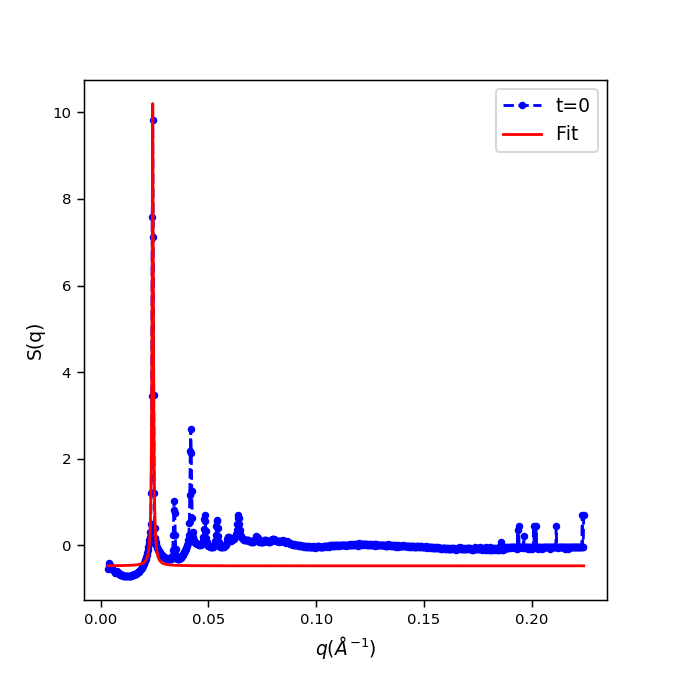

The fit goodness of curve:1 is: 0.98880
The fit goodness of curve:2 is: 0.98851
The fit goodness of curve:3 is: 0.98841
The fit goodness of curve:4 is: 0.98813
The fit goodness of curve:5 is: 0.98793
The fit goodness of curve:6 is: 0.98770
The fit goodness of curve:7 is: 0.98757
The fit goodness of curve:8 is: 0.98731
The fit goodness of curve:9 is: 0.98672
The fit goodness of curve:10 is: 0.98636
The fit goodness of curve:11 is: 0.98600
The fit goodness of curve:12 is: 0.98588
The fit goodness of curve:13 is: 0.98534
The fit goodness of curve:14 is: 0.98477
The fit goodness of curve:15 is: 0.98444
The fit goodness of curve:16 is: 0.98381
The fit goodness of curve:17 is: 0.98334
The fit goodness of curve:18 is: 0.98234
The fit goodness of curve:19 is: 0.98159
The fit goodness of curve:20 is: 0.98084
The fit goodness of curve:21 is: 0.98064
The fit goodness of curve:22 is: 0.97982
The fit goodness of curve:23 is: 0.97869
The fit goodness of curve:24 is: 0.97726
The fit goodness of curve

<IPython.core.display.Javascript object>


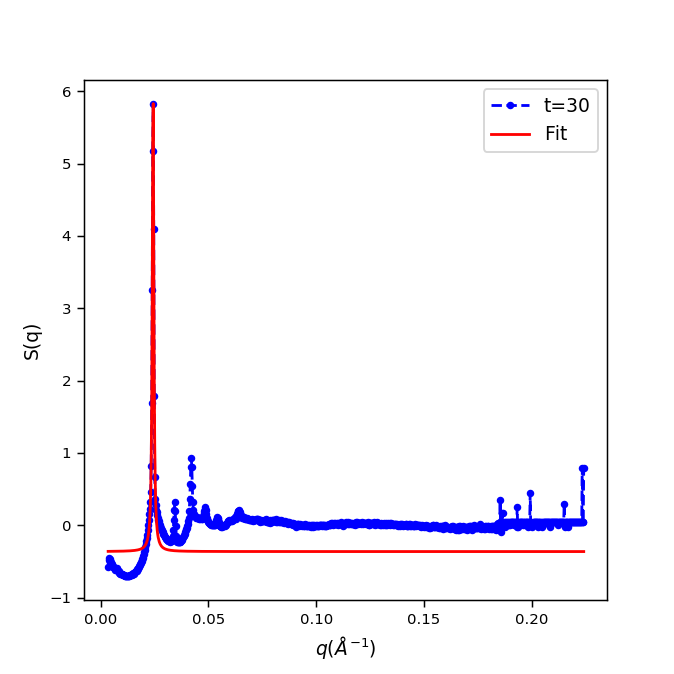

The fit goodness of curve:31 is: 0.97115
The fit goodness of curve:32 is: 0.96978
The fit goodness of curve:33 is: 0.96836
The fit goodness of curve:34 is: 0.96797
The fit goodness of curve:35 is: 0.96689
The fit goodness of curve:36 is: 0.96667
The fit goodness of curve:37 is: 0.96479
The fit goodness of curve:38 is: 0.96355
The fit goodness of curve:39 is: 0.96222
The fit goodness of curve:40 is: 0.96113
The fit goodness of curve:41 is: 0.95989
The fit goodness of curve:42 is: 0.95861
The fit goodness of curve:43 is: 0.95678
The fit goodness of curve:44 is: 0.95627
The fit goodness of curve:45 is: 0.95470
The fit goodness of curve:46 is: 0.95349
The fit goodness of curve:47 is: 0.95148
The fit goodness of curve:48 is: 0.94930
The fit goodness of curve:49 is: 0.94841
The fit goodness of curve:50 is: 0.94688
The fit goodness of curve:51 is: 0.94525
The fit goodness of curve:52 is: 0.94426
The fit goodness of curve:53 is: 0.94243
The fit goodness of curve:54 is: 0.94142
The fit goodness

<IPython.core.display.Javascript object>


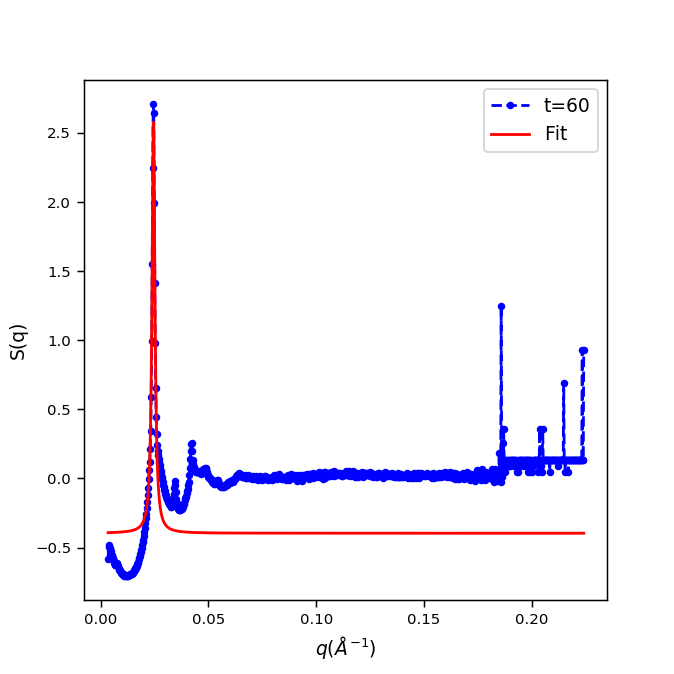

The fit goodness of curve:61 is: 0.92823
The fit goodness of curve:62 is: 0.92480
The fit goodness of curve:63 is: 0.92176
The fit goodness of curve:64 is: 0.92064
The fit goodness of curve:65 is: 0.91788
The fit goodness of curve:66 is: 0.91733
The fit goodness of curve:67 is: 0.91387
The fit goodness of curve:68 is: 0.91420
The fit goodness of curve:69 is: 0.91003
The fit goodness of curve:70 is: 0.90809
The fit goodness of curve:71 is: 0.90757
The fit goodness of curve:72 is: 0.90636
The fit goodness of curve:73 is: 0.90322
The fit goodness of curve:74 is: 0.90114
The fit goodness of curve:75 is: 0.89934
The fit goodness of curve:76 is: 0.89671
The fit goodness of curve:77 is: 0.89510
The fit goodness of curve:78 is: 0.89355
The fit goodness of curve:79 is: 0.89443
The fit goodness of curve:80 is: 0.89205
The fit goodness of curve:81 is: 0.89203
The fit goodness of curve:82 is: 0.88975
The fit goodness of curve:83 is: 0.88753
The fit goodness of curve:84 is: 0.88413
The fit goodness

<IPython.core.display.Javascript object>


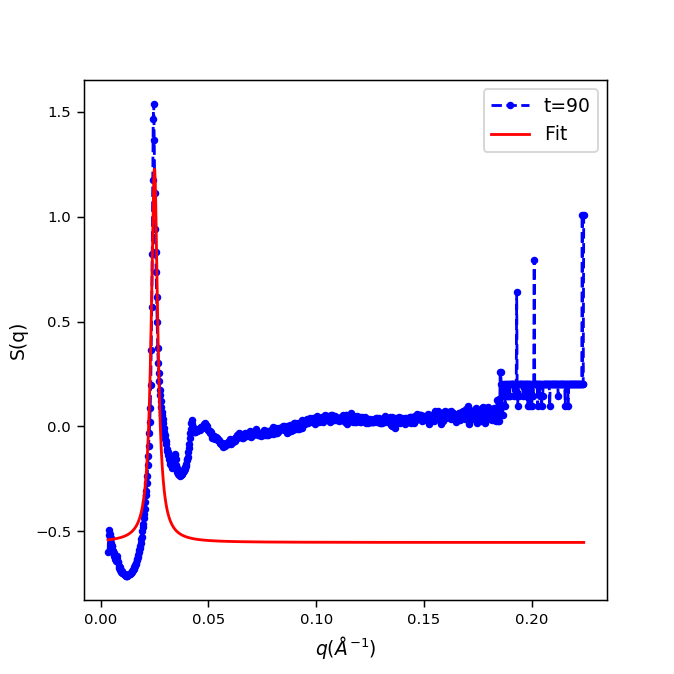

The fit goodness of curve:91 is: 0.87966
The fit goodness of curve:92 is: 0.87750
The fit goodness of curve:93 is: 0.87582
The fit goodness of curve:94 is: 0.87806
The fit goodness of curve:95 is: 0.87887
The fit goodness of curve:96 is: 0.87887
The fit goodness of curve:97 is: 0.87923
The fit goodness of curve:98 is: 0.87761
The fit goodness of curve:99 is: 0.88015
The fit goodness of curve:100 is: 0.88038
The fit goodness of curve:101 is: 0.88231
The fit goodness of curve:102 is: 0.88211
The fit goodness of curve:103 is: 0.88215
The fit goodness of curve:104 is: 0.88288
The fit goodness of curve:105 is: 0.88507
The fit goodness of curve:106 is: 0.88678
The fit goodness of curve:107 is: 0.88652
The fit goodness of curve:108 is: 0.88925
The fit goodness of curve:109 is: 0.89109
The fit goodness of curve:110 is: 0.89295
The fit goodness of curve:111 is: 0.89192
The fit goodness of curve:112 is: 0.89240
The fit goodness of curve:113 is: 0.89799
The fit goodness of curve:114 is: 0.89867
T

<IPython.core.display.Javascript object>


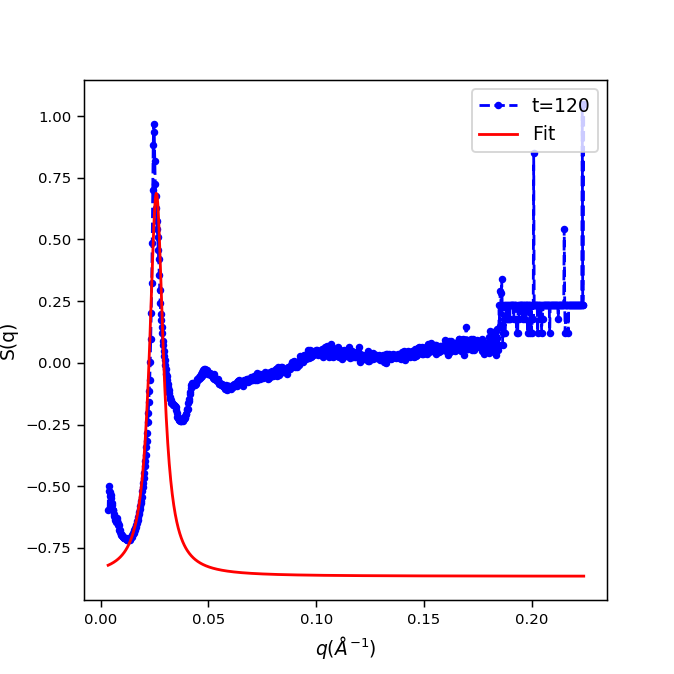

The fit goodness of curve:121 is: 0.90783
The fit goodness of curve:122 is: 0.91160
The fit goodness of curve:123 is: 0.91214
The fit goodness of curve:124 is: 0.91401
The fit goodness of curve:125 is: 0.91547
The fit goodness of curve:126 is: 0.91751
The fit goodness of curve:127 is: 0.91817
The fit goodness of curve:128 is: 0.91889
The fit goodness of curve:129 is: 0.92136
The fit goodness of curve:130 is: 0.92237
The fit goodness of curve:131 is: 0.92405
The fit goodness of curve:132 is: 0.92584
The fit goodness of curve:133 is: 0.92666
The fit goodness of curve:134 is: 0.92725
The fit goodness of curve:135 is: 0.92965
The fit goodness of curve:136 is: 0.93001
The fit goodness of curve:137 is: 0.93092
The fit goodness of curve:138 is: 0.93353
The fit goodness of curve:139 is: 0.93455
The fit goodness of curve:140 is: 0.93658
The fit goodness of curve:141 is: 0.93707
The fit goodness of curve:142 is: 0.93723
The fit goodness of curve:143 is: 0.93712
The fit goodness of curve:144 is: 

<IPython.core.display.Javascript object>


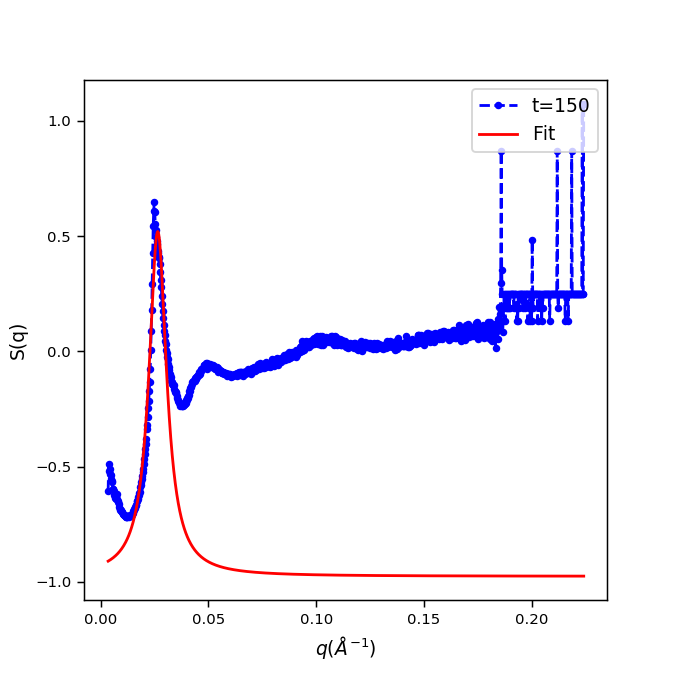

The fit goodness of curve:151 is: 0.94779
The fit goodness of curve:152 is: 0.94793
The fit goodness of curve:153 is: 0.94840
The fit goodness of curve:154 is: 0.95049
The fit goodness of curve:155 is: 0.94958
The fit goodness of curve:156 is: 0.95154
The fit goodness of curve:157 is: 0.95127
The fit goodness of curve:158 is: 0.95182
The fit goodness of curve:159 is: 0.95470
The fit goodness of curve:160 is: 0.95610
The fit goodness of curve:161 is: 0.95585
The fit goodness of curve:162 is: 0.95571
The fit goodness of curve:163 is: 0.95713
The fit goodness of curve:164 is: 0.95909
The fit goodness of curve:165 is: 0.95900
The fit goodness of curve:166 is: 0.95933
The fit goodness of curve:167 is: 0.95988
The fit goodness of curve:168 is: 0.96173
The fit goodness of curve:169 is: 0.96193
The fit goodness of curve:170 is: 0.96269
The fit goodness of curve:171 is: 0.96264
The fit goodness of curve:172 is: 0.96380
The fit goodness of curve:173 is: 0.96426
The fit goodness of curve:174 is: 

<IPython.core.display.Javascript object>


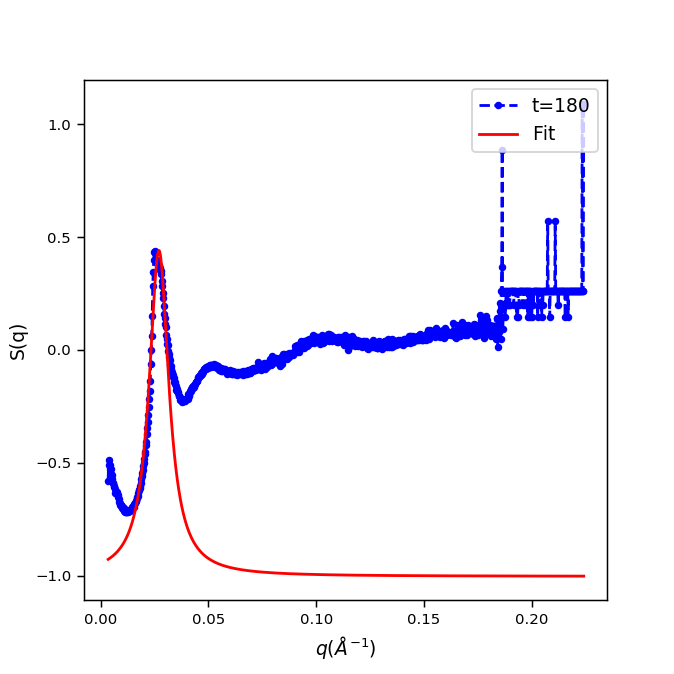

The fit goodness of curve:181 is: 0.96828
The fit goodness of curve:182 is: 0.96953
The fit goodness of curve:183 is: 0.96992
The fit goodness of curve:184 is: 0.96991
The fit goodness of curve:185 is: 0.97090
The fit goodness of curve:186 is: 0.97121
The fit goodness of curve:187 is: 0.97188
The fit goodness of curve:188 is: 0.97240
The fit goodness of curve:189 is: 0.97214
The fit goodness of curve:190 is: 0.97375
The fit goodness of curve:191 is: 0.97432
The fit goodness of curve:192 is: 0.97486
The fit goodness of curve:193 is: 0.97478
The fit goodness of curve:194 is: 0.97453
The fit goodness of curve:195 is: 0.97550
The fit goodness of curve:196 is: 0.97624
The fit goodness of curve:197 is: 0.97608
The fit goodness of curve:198 is: 0.97612
The fit goodness of curve:199 is: 0.97696
The fit goodness of curve:200 is: 0.97775
The fit goodness of curve:201 is: 0.97729
The fit goodness of curve:202 is: 0.97770
The fit goodness of curve:203 is: 0.97753
The fit goodness of curve:204 is: 

<IPython.core.display.Javascript object>


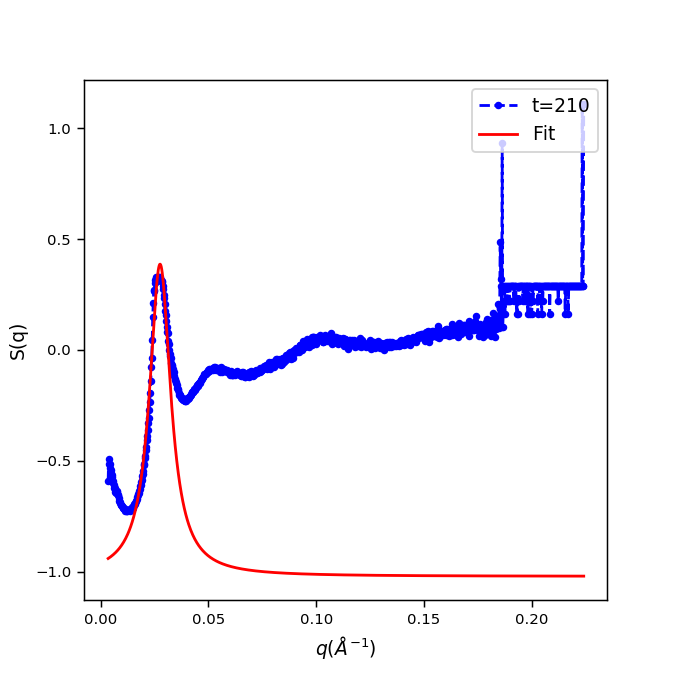

The fit goodness of curve:211 is: 0.98019
The fit goodness of curve:212 is: 0.98016
The fit goodness of curve:213 is: 0.98119
The fit goodness of curve:214 is: 0.98076
The fit goodness of curve:215 is: 0.98176
The fit goodness of curve:216 is: 0.98110
The fit goodness of curve:217 is: 0.98178
The fit goodness of curve:218 is: 0.98244
The fit goodness of curve:219 is: 0.98225
The fit goodness of curve:220 is: 0.98286
The fit goodness of curve:221 is: 0.98280
The fit goodness of curve:222 is: 0.98316
The fit goodness of curve:223 is: 0.98323
The fit goodness of curve:224 is: 0.98318
The fit goodness of curve:225 is: 0.98350
The fit goodness of curve:226 is: 0.98380
The fit goodness of curve:227 is: 0.98416
The fit goodness of curve:228 is: 0.98445
The fit goodness of curve:229 is: 0.98482
The fit goodness of curve:230 is: 0.98500
The fit goodness of curve:231 is: 0.98528
The fit goodness of curve:232 is: 0.98512
The fit goodness of curve:233 is: 0.98575
The fit goodness of curve:234 is: 

<IPython.core.display.Javascript object>


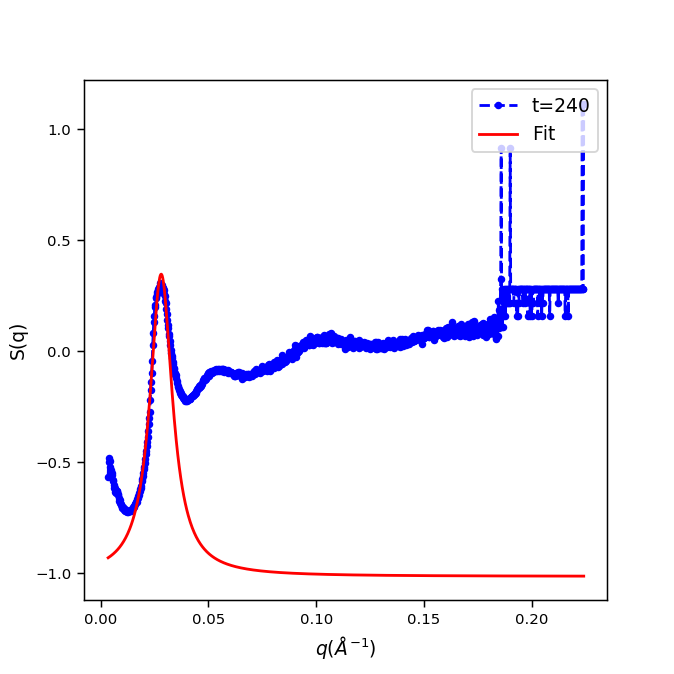

The fit goodness of curve:241 is: 0.98775
The fit goodness of curve:242 is: 0.98804
The fit goodness of curve:243 is: 0.98845
The fit goodness of curve:244 is: 0.98746
The fit goodness of curve:245 is: 0.98825
The fit goodness of curve:246 is: 0.98846
The fit goodness of curve:247 is: 0.98836
The fit goodness of curve:248 is: 0.98865
The fit goodness of curve:249 is: 0.98873


In [622]:
a =  5
q0= 0.024
sigma= 0.001
b= 1
i=0
for j in range( N ) [:]:    
    x = q 
    y =   sqs[:,j] 
    popt,peff, xf, yf, R2 = fit_curve(x, y, p0=[a,q0,sigma,b],  xrange = [q1,q2], func='L', verbose= False )  
    a,qc,wid,b =  popt
    #print(    )
    fits[j] = [ abs(qc), 2*abs(wid), _1Lorentzian( abs(qc), *popt), R2    ]
    print( 'The fit goodness of curve:%s is: %.5f'%( j, R2 ) )
    if True: #True:#False:
        if j%30==0:
            fig, ax = plt.subplots( figsize=[5,5])
            #qind = 6
            plot1D(   x = x, y= y , m= markers[i], markersize=3,
                       ls='--', c= colors[i],  ax=ax, legend= 't=%s'%j )
            plot1D(   x = x, y= _1Lorentzian(x, *popt)  , m= '',
                       ls='-', c= 'r',  ax=ax, legend= 'Fit' )
            #ax.set_xlim( 0.01, 0.1 )   
            #ax.set_xlim( 22.5, 40 )  
            ax.set_xlabel(r'$q (\AA^{-1})$')
            ax.set_ylabel('S(q)')
            ax.set_title('')
            ax.legend(loc='upper right')

In [623]:
if False:
    fig  = plt.figure( figsize=[6,5])
    i=0
    ax = fig.add_subplot( 111)
    x = np.arange(N) * md[uid][1]
    y =  fits[:,3 ]
    plot1D(   x = x, y= y , m= markers[i], markersize=3, ls='--', c= colors[i],# ylim=[0.5,1],
           ax=ax, legend= 'R2', title=''  )
    ax.set_xscale('log')
    ax.set_xlabel(r'$t (s)$')
    ax.set_ylabel('R2')
    ax.set_title('fit goodness')
            

<IPython.core.display.Javascript object>


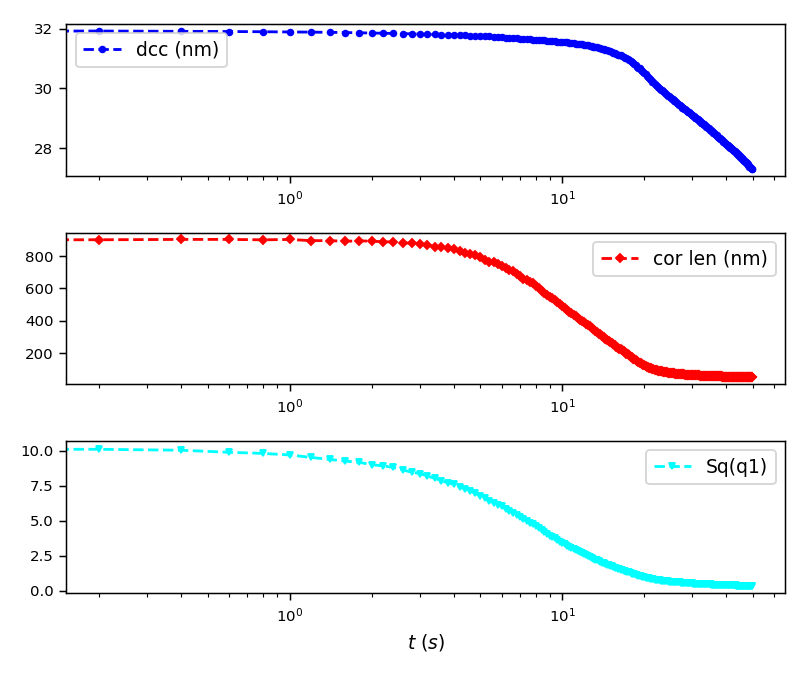

In [415]:
fig  = plt.figure( figsize=[6,5])

i=0
ax = fig.add_subplot( 311)
x = np.arange(N) * md[uid][1]
dcc = np.sqrt( 6) * np.pi/fits[:,0]/10
plot1D(   x = x, y= dcc , m= markers[i], markersize=3, ls='--', c= colors[i],  ax=ax, legend= 'dcc (nm)', title=''  )
ax.set_xscale('log')

i+=1
ax = fig.add_subplot( 312) 
cl= 2*np.pi/fits[:,1]/10
plot1D(   x = x, y= cl , m= markers[i], markersize=3, ls='--', c= colors[i],  ax=ax, legend= 'cor len (nm)', title=''  )
ax.set_xscale('log')

i+=1
ax = fig.add_subplot( 313) 
h1= fits[:,2]
plot1D(   x = x, y= h1 , m= markers[i], markersize=3, ls='--', c= colors[i],  ax=ax, legend= 'Sq(q1)', title=''  )

ax.set_xlabel(r'$t\ (s) $')
#ax.set_ylabel('S(q)')
ax.set_title('')
ax.set_xscale('log')

plt.tight_layout()


# Do correlation to evaluation beam damage

In [317]:
%run -i /home/yuzhang/XScattering/SAXS/Codes/beam_damage_study.py

In [318]:
ca = get_2D_corMatrix( sqs,  q=None, xrange=None, type= 'cor' )
cb = get_2D_corMatrix( sqs,  q=None, xrange=None, type= 'cor_1st' )


## For correlation of Sq

<IPython.core.display.Javascript object>


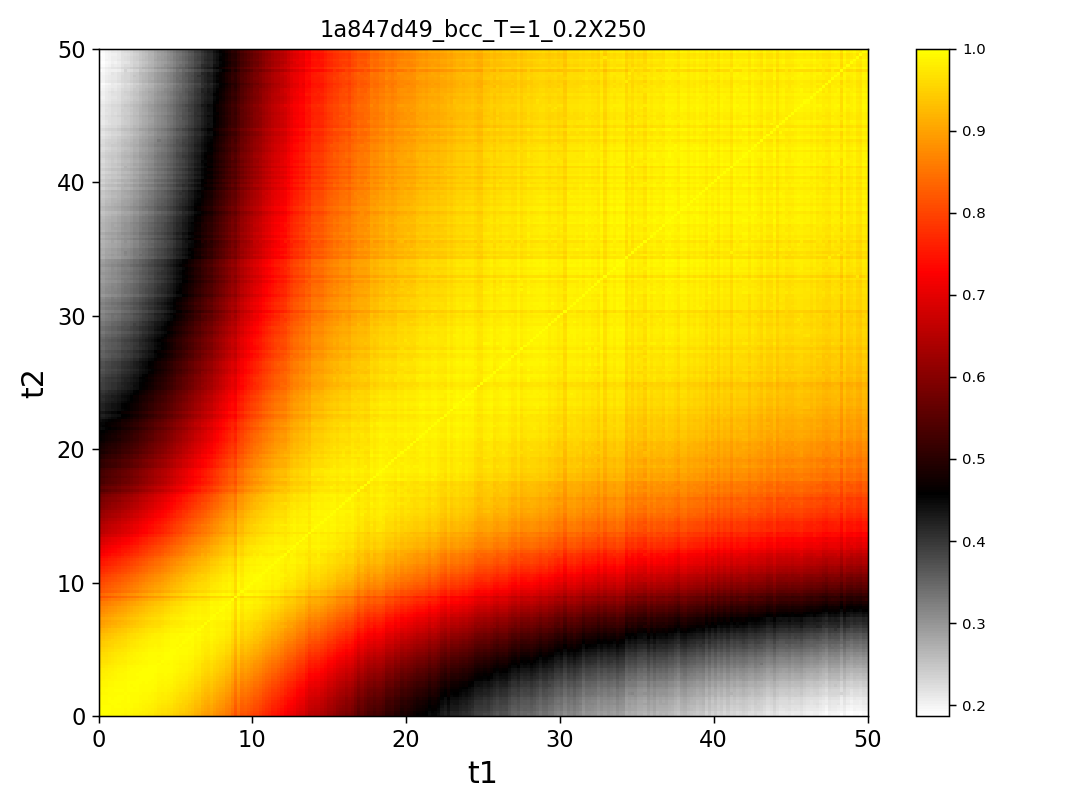

In [591]:
fig, ax = plt.subplots( figsize= [8,6])

show_img( ca, # vmin = 1-0.005, vmax=1.0,  #vmin= A - .2 * D, vmax= A + .2 * D,
         #vmin=0.25, vmax=1.0,
          ax= [fig,ax], show_colorbar=True,
          extent=[ 0,   md[uid][1] * md[uid][2]  , 0, md[uid][1] * md[uid][2] ]  ,    
          xlabel= 't1', ylabel='t2',   cmap =  cmap_albula, )
         #cmap=cmap_hdr_goldish )
ax.set_title( uid + '_%s'%md[uid][0] )
plt.savefig( plotDir + 'uid=%s_TT_Sq_%s.png'%(uid, md[uid][0] ))



## Fit time decay

In [625]:
beta, gama, alpha, base = 1, 0.05, 1, 0  
p0=[beta, gama, alpha, base]

y= np.average(  ca[0:1], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
popt, pcov = curve_fit( decay_fit_func, x[:], y[:] , 
                       p0= p0,bounds=( [.5,  0.001,   0.5,   -.2],[1.2,   100,    2.5,  .5]) )

perr = np.sqrt(np.diag(pcov))
beta, gama, alpha, base = popt
beta_, gama_, alpha_, base_ = perr
popt, perr

(array([0.82106968, 0.05097689, 1.61313858, 0.19883902]),
 array([0.00453852, 0.00025377, 0.01799762, 0.00253535]))

<IPython.core.display.Javascript object>


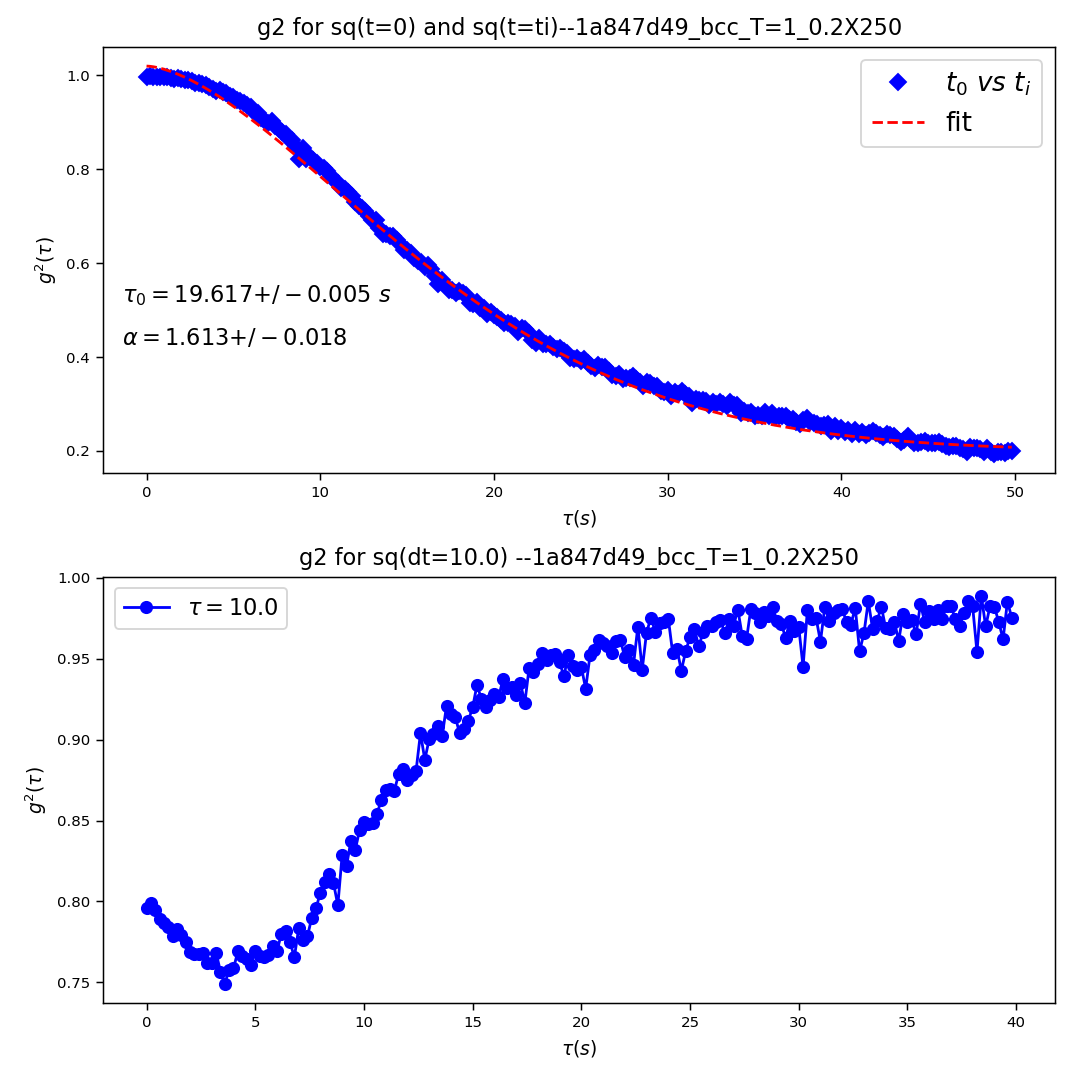

In [637]:
fig = plt.figure( figsize=[ 8,8 ])
ax = fig.add_subplot( 211 ) 

i = 0
x= np.arange( md[uid][2] ) *  md[uid][1]
#qind = find_index( q, 0.0214)

if False:
    qind = find_index( q, 0.0237)
    y=sqs[qind]    
    y= cl
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y= yi, m=  'o', c= 'k', ax=ax, legend= 'cl', legend_size = 7, logx= True, logy= False  ) 
    y= h1
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y=yi, m=  'o', c= 'g', ax=ax, legend= 'hl', legend_size = 7, logx= True, logy= False  )  
    y= dcc
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y=yi, m=  'o', c= 'y', ax=ax, legend= 'dcc', legend_size = 7, logx= True, logy= False  ) 



i+=1
### Plot the correlation between t0 and ti
y= np.average(  ca[0:5], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m= 'D',c='b',ax=ax,legend= r'$t_0\ vs\  t_i$' , legend_size = 14,logx= True, logy= False,ls=''  ) 

y= decay_fit_func(x, *popt)
plot1D(x =x,y=y, m='',c= 'r',ax=ax,legend='fit',legend_size = 14,logx= True, logy= False , ls='--' ) 

px=.02;py=.5;dt=.1
txts = r'$\tau_0$' + r'$ = %.3f$'%(1/gama)  + r'$ +/- %.3f\ s$'%(   gama_/gama )  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)
dt +=0.1;
txts = r'$\alpha$' + r'$ = %.3f$'%(alpha)  + r'$ +/- %.3f$'%(alpha_)  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
ax.set_title( 'g2 for sq(t=0) and sq(t=ti)--' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')

#ax.set_xscale('log')
ax.set_xscale('linear')

ax = fig.add_subplot( 212 ) 
i = 0

### Plot the correlation between ti and ti+1  
diak =  50
y =  np.diag( ca, k= diak )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m=  markers[i],c=colors[i],ax=ax,legend=r'$\tau=%s$'%(diak* md[uid][1]), legend_size = 12,logx= True, logy= False  )  

ax.set_xscale('linear')

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
#ax.set_title( uid + '_%s'%md[uid][0] )
ax.set_title( 'g2 for sq(dt=%s) --'%(diak* md[uid][1]) + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')
plt.tight_layout()

plt.savefig( plotDir + 'uid=%s_g2_Sq_%s.png'%(uid, md[uid][0] ))


# plot with p1 fitting

<IPython.core.display.Javascript object>


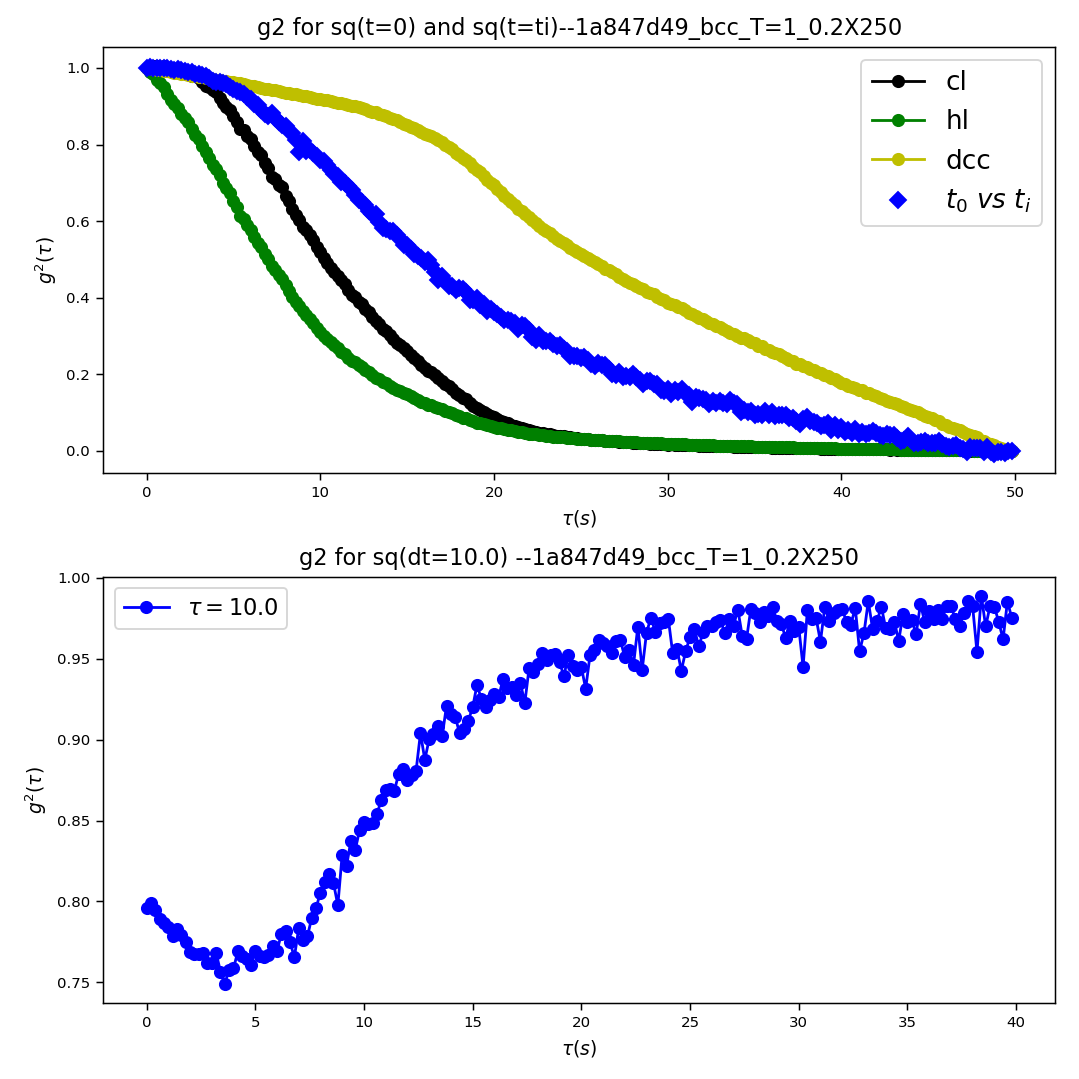

In [640]:
fig = plt.figure( figsize=[ 8,8 ])
ax = fig.add_subplot( 211 ) 

i = 0
x= np.arange( md[uid][2] ) *  md[uid][1]
#qind = find_index( q, 0.0214)

if True:
    qind = find_index( q, 0.0237)
    y=sqs[qind]    
    y= cl
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y= yi, m=  'o', c= 'k', ax=ax, legend= 'cl', legend_size = 7, logx= True, logy= False  ) 
    y= h1
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y=yi, m=  'o', c= 'g', ax=ax, legend= 'hl', legend_size = 7, logx= True, logy= False  )  
    y= dcc
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y=yi, m=  'o', c= 'y', ax=ax, legend= 'dcc', legend_size = 7, logx= True, logy= False  ) 



i+=1
### Plot the correlation between t0 and ti
y= np.average(  ca[0:5], axis=0 )
yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=yi,m= 'D',c='b',ax=ax,legend= r'$t_0\ vs\  t_i$' , legend_size = 14,logx= True, logy= False,ls=''  ) 

if False:
    y= decay_fit_func(x, *popt)
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D(x =x,y=yi, m='',c= 'r',ax=ax,legend='fit',legend_size = 14,logx= True, logy= False , ls='--' ) 

    px=.02;py=.5;dt=.1
    txts = r'$\tau_0$' + r'$ = %.3f$'%(1/gama)  + r'$ +/- %.3f\ s$'%(   gama_/gama )  
    ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)
    dt +=0.1;
    txts = r'$\alpha$' + r'$ = %.3f$'%(alpha)  + r'$ +/- %.3f$'%(alpha_)  
    ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
ax.set_title( 'g2 for sq(t=0) and sq(t=ti)--' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')

#ax.set_xscale('log')
ax.set_xscale('linear')

ax = fig.add_subplot( 212 ) 
i = 0

### Plot the correlation between ti and ti+1  
diak =  50
y =  np.diag( ca, k= diak )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m=  markers[i],c=colors[i],ax=ax,legend=r'$\tau=%s$'%(diak* md[uid][1]), legend_size = 12,logx= True, logy= False  )  

ax.set_xscale('linear')

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
#ax.set_title( uid + '_%s'%md[uid][0] )
ax.set_title( 'g2 for sq(dt=%s) --'%(diak* md[uid][1]) + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')
plt.tight_layout()

plt.savefig( plotDir + 'uid=%s_g2_Sq_%s.png'%(uid, md[uid][0] ))


## For correlation of diff(Sq)

<IPython.core.display.Javascript object>


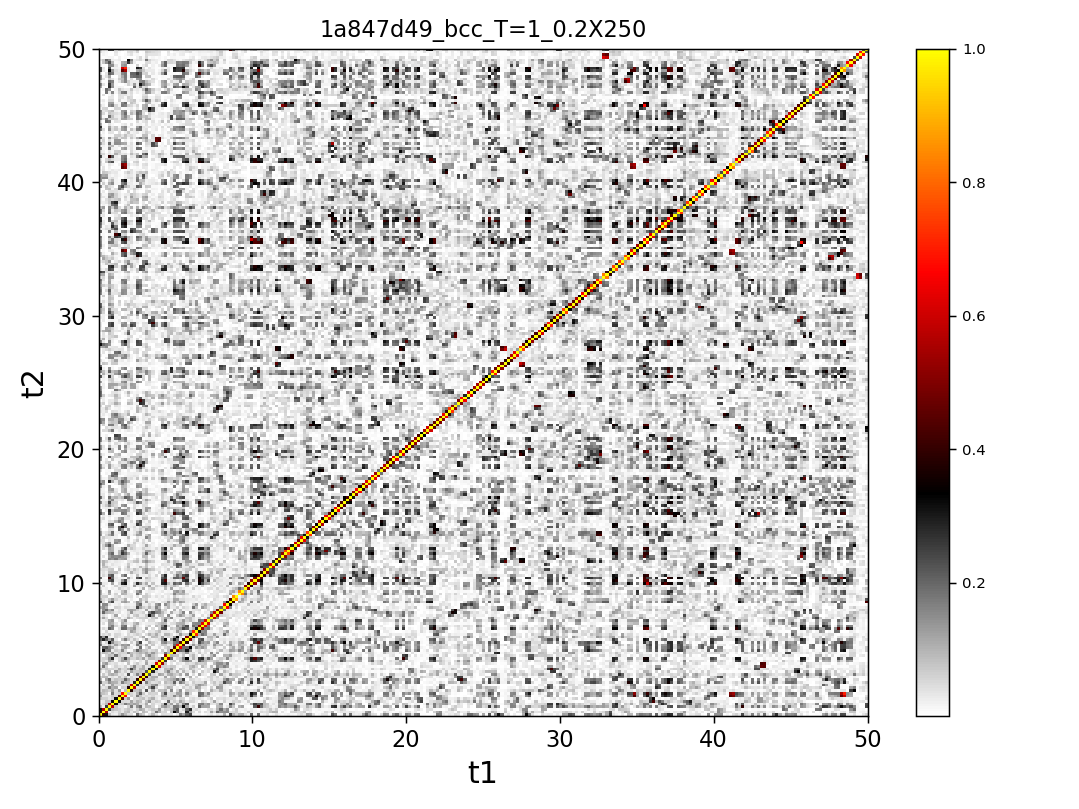

In [599]:
fig, ax = plt.subplots( figsize= [8,6])

show_img( cb, # vmin = 1-0.005, vmax=1.0,  #vmin= A - .2 * D, vmax= A + .2 * D,
          ax= [fig,ax], show_colorbar=True,
          extent=[ 0,   md[uid][1] * md[uid][2]  , 0, md[uid][1] * md[uid][2] ]  ,    
          xlabel= 't1', ylabel='t2',   cmap =  cmap_albula, )
         #cmap=cmap_hdr_goldish )
ax.set_title( uid + '_%s'%md[uid][0] )
plt.savefig( plotDir + 'uid=%s_TT_DiffSq_%s.png'%(uid, md[uid][0] ))

In [600]:
beta, gama, alpha, base = 1, 0.05, 1, 0  
p0=[beta, gama, alpha, base]

y= np.average(  cb[0:5], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
poptb, pcovb = curve_fit( decay_fit_func, x[:], y[:] , 
                       p0= p0,bounds=( [.5,  0.001,   0.5,   -.2],[1.2,   100,    2.5,  .5]) )

perrb = np.sqrt(np.diag(pcovb))
betab, gamab, alphab, baseb = poptb
betab_, gamab_, alphab_, baseb_ = perrb
poptb, perrb

(array([0.5       , 1.23870917, 2.19737429, 0.06613878]),
 array([0.03150781, 0.08214239, 0.44900378, 0.00249912]))

<IPython.core.display.Javascript object>


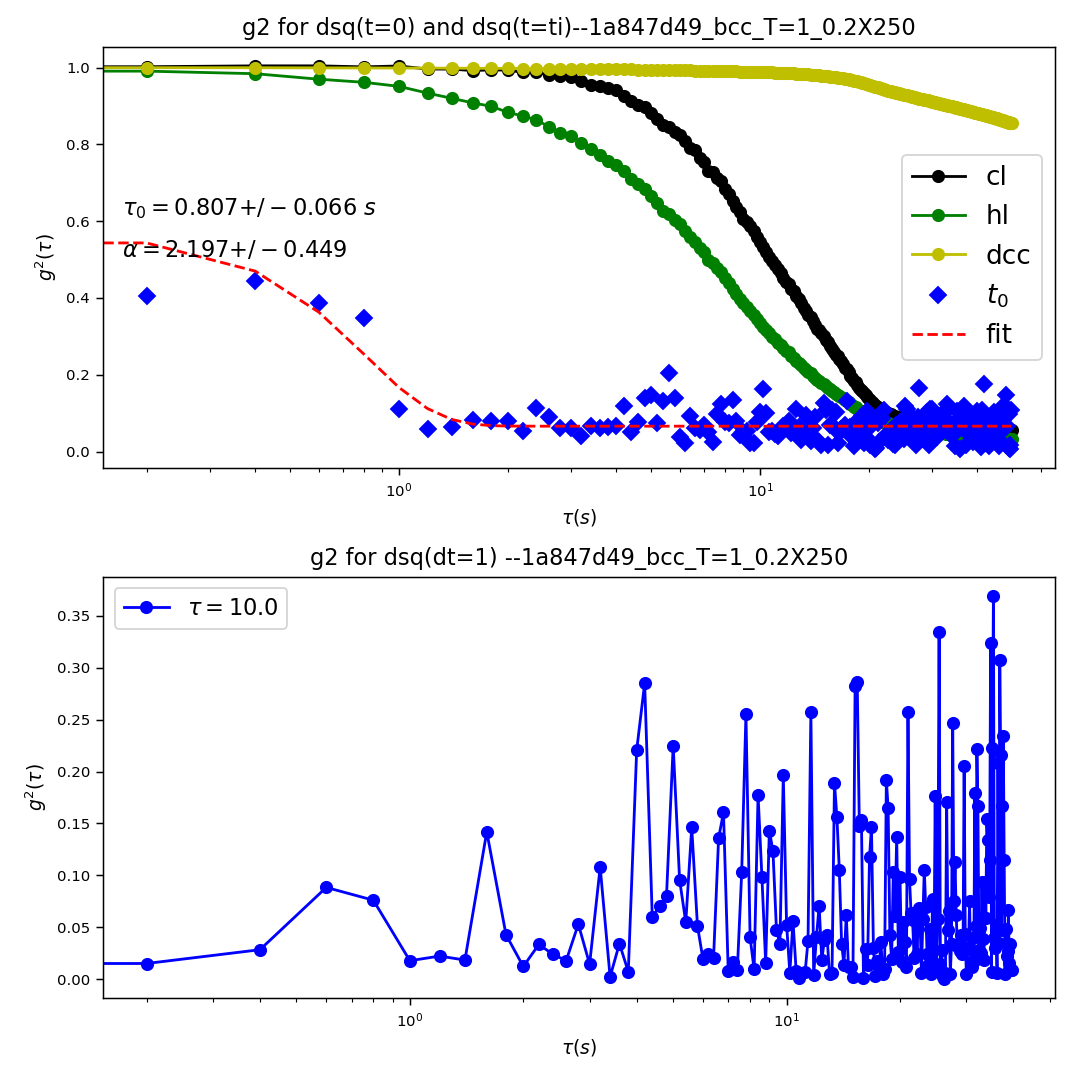

In [604]:
fig = plt.figure( figsize=[ 8,8 ])
ax = fig.add_subplot( 211 ) 

i = 0
x= np.arange( md[uid][2] ) *  md[uid][1]
#qind = find_index( q, 0.0214)
y= cl
plot1D( x= x, y=y/y[0], m=  'o', c= 'k', ax=ax, legend= 'cl', legend_size = 7, logx= True, logy= False  )   

y= h1
plot1D( x= x, y=y/y[0], m=  'o', c= 'g', ax=ax, legend= 'hl', legend_size = 7, logx= True, logy= False  )   

y= dcc
plot1D( x= x, y=y/y[0], m=  'o', c= 'y', ax=ax, legend= 'dcc', legend_size = 7, logx= True, logy= False  )   

i+=1
### Plot the correlation between t0 and ti
y= np.average(  cb[0:5], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m= 'D',c='b',ax=ax,legend=r'$t_0~t_i$', legend_size = 7,logx= True, logy= False,ls=''  ) 

y= decay_fit_func(x, *poptb)
plot1D(x =x,y=y, m='',c= 'r',ax=ax,legend='fit',legend_size = 14,logx= True, logy= False , ls='--' ) 

px=.02;py=.7;dt=.1
txts = r'$\tau_0$' + r'$ = %.3f$'%(1/gamab)  + r'$ +/- %.3f\ s$'%(   gamab_/gamab )  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)
dt +=0.1;
txts = r'$\alpha$' + r'$ = %.3f$'%(alphab)  + r'$ +/- %.3f$'%(alphab_)  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
ax.set_title( 'g2 for dsq(t=0) and dsq(t=ti)--' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')


ax = fig.add_subplot( 212 ) 
i = 0

### Plot the correlation between ti and ti+1  
diak = 50 
y =  np.diag( cb, k= diak )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m=  markers[i],c=colors[i],ax=ax,legend=r'$\tau=%s$'%(diak* md[uid][1]), legend_size = 12,logx= True, logy= False  )  


#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
#ax.set_title( uid + '_%s'%md[uid][0] )
ax.set_title( 'g2 for dsq(dt=1) --' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')
plt.tight_layout()

plt.savefig( plotDir + 'uid=%s_g2_dSq_%s.png'%(uid, md[uid][0] ))


# The End